<a href="https://colab.research.google.com/github/afrarafeeqa2004/machine-learning/blob/main/customersegmentationkmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Online Retail.csv")

In [ ]:
df.columns = df.columns.str.strip().str.replace("ï»¿", "")

In [ ]:
df = df.dropna(subset=["CustomerID"])

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d-%m-%Y %H:%M", errors="coerce")

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
reference_date = df["InvoiceDate"].max() + timedelta(days=1)

In [ ]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                    # Frequency
    "TotalPrice": "sum"                                        # Monetary
}).reset_index()

In [ ]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

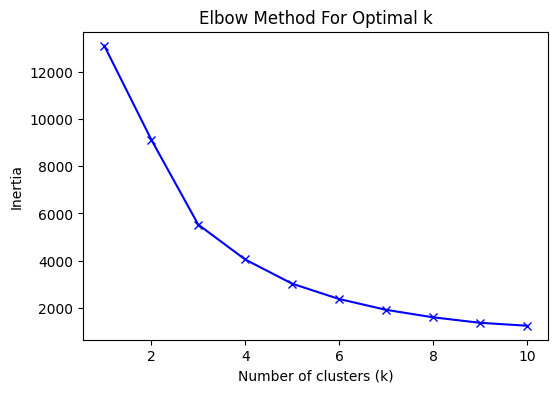

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [ ]:
cluster_summary = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"})
print(cluster_summary)

            Recency  Frequency       Monetary  NumCustomers
Cluster                                                    
0         41.606500   4.802461    1478.515539          3169
1        247.951242   1.805888     453.488888          1087
2          7.666667  89.000000  182181.981667             6
3          9.181818  40.672727   18441.961455           110
